In [5]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('lasvegas.csv', encoding='UTF-8')

In [7]:
df.head()

,LVR,REF,INSUR,RATE,AMOUNT,CREDIT,TERM,ARM,DELINQUENT
0,80.0,0,1,6.355,1.5760,532,30,1,0
1,89.0,1,1,6.875,3.1595,703,30,1,0
2,80.0,1,1,7.080,1.7600,648,30,1,0
3,80.0,0,0,12.855,1.9680,599,30,1,1
4,70.0,1,0,5.760,1.8620,626,30,1,0


In [8]:
y = df['DELINQUENT']
X = df.drop('DELINQUENT',axis=1)

In [ ]:
'''
DELINQUENT = 1 (대출 만기일 이후, 90일 이내에 상환되지 않은 경우: 연체), 0 (그렇지 않은 경우)
LVR = 자산 대비 대출의 비율
REF = 1 (대출이 재융자로 이루어진 경우), 0 (그렇지 않은 경우)
INSUR = 1 (해당 대출이 주택담보대출 보험에 가입된 경우), 0 (그렇지 않은 경우)
RATE = 해당 대출의 대출시점 기준 최초 이자율
CREDIT = 해당 대출을 실행한 사람의 신용 점수
TERM = 해당 대출의 만기까지 실행 기간
ARM = 1 (해당 대출이 변동 금리 상품인 경우), 0 (고정 금리인 경우)
'''

In [9]:
import statsmodels.api as sm

In [10]:
X_cons = sm.add_constant(X)

In [12]:
Model = sm.OLS(y,X_cons).fit()
print(Model.summary())

                            OLS Regression Results                            
Dep. Variable:             DELINQUENT   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     62.77
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           4.83e-83
Time:                        00:38:23   Log-Likelihood:                -295.80
No. Observations:                1000   AIC:                             609.6
Df Residuals:                     991   BIC:                             653.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6885      0.211      3.259      0.0

## Sample Split

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
train, test = train_test_split(df, test_size=0.2, random_state=131)
train, validation = train_test_split(train, test_size=0.25, random_state=211)

In [15]:
X = df.drop(['DELINQUENT'],axis=1)
y = df['DELINQUENT']
y_train = train['DELINQUENT']
x_train = train.drop(['DELINQUENT'],axis=1)
y_val = validation['DELINQUENT']
X_val = validation.drop(['DELINQUENT'], axis=1)
y_test = test['DELINQUENT']
X_test = test.drop(['DELINQUENT'],axis=1)

## Linear Probability Model

In [16]:
lpm = LinearRegression()
lpm.fit(x_train,y_train)

LinearRegression()

In [ ]:
# verification
# X_cons = sm.add_constant()
# ver = sm.().fit()
# ver.summary()

In [17]:
print(lpm.intercept_)
print(lpm.coef_)

0.48122881215887797
[ 1.86194773e-03 -4.87932282e-02 -5.05783387e-01  4.77662042e-02
  2.67200560e-02 -2.31706344e-04 -1.41172406e-02  1.44275719e-01]


In [23]:
lpm.predict(X_val)[:]

array([ 1.42151063e-01, -1.15958245e-01,  6.38820070e-01,  3.22287934e-01,
        9.21908435e-02,  1.27634936e-01, -1.14764068e-01,  6.41791464e-02,
        3.80440996e-02,  1.01057011e-03,  6.04714023e-01,  2.96907404e-01,
        2.81838986e-01,  6.32964583e-01,  5.55799258e-01, -1.44323881e-02,
        3.94826230e-02,  4.36781428e-01, -1.07052195e-01,  2.22315793e-02,
        1.54841596e-01,  5.39912645e-02,  3.92215885e-01,  6.30462222e-01,
        5.35452176e-01,  1.25924735e-01,  5.86541419e-01,  1.25834879e-01,
        5.00967863e-02,  6.30491572e-02, -7.67473887e-02,  5.27519209e-01,
       -1.01269632e-02,  5.43834403e-01,  9.67278993e-02, -1.98045421e-01,
        7.60183800e-02,  6.61006590e-02, -1.10573652e-01,  2.70220921e-01,
        5.84919087e-02, -8.56588576e-02,  5.88331432e-01,  1.70346902e-01,
        4.63684942e-02,  1.93045667e-01,  7.19044219e-01, -1.24813665e-02,
        2.59462404e-01,  7.87006650e-02,  7.33306117e-02,  1.51948163e-01,
        1.58376067e-01,  

In [45]:
result = pd.DataFrame(lpm.predict(X_val), columns=['pred_prob']) 
result.head()

,pred_prob
0,0.142151
1,-0.115958
2,0.638820
3,0.322288
4,0.092191


<Axes: ylabel='Frequency'>

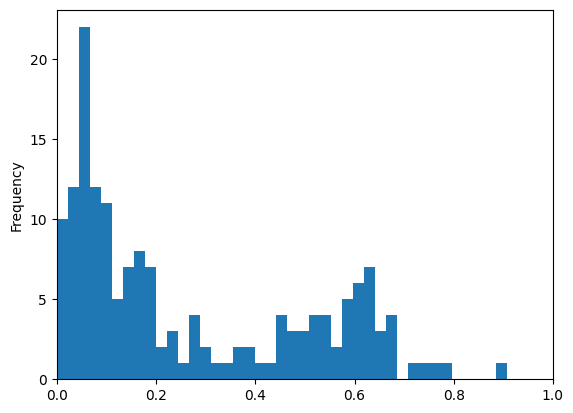

In [46]:
result.pred_prob.plot(kind='hist',bins=50, xlim=([0,1]))

In [33]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [36]:
fpr, tpr, threshold = roc_curve(y_val, result.pred_prob)
print(fpr)
print(tpr)
print(threshold)

[0.         0.00598802 0.00598802 0.01197605 0.01197605 0.02994012
 0.02994012 0.04191617 0.04191617 0.06586826 0.06586826 0.07784431
 0.07784431 0.08383234 0.08383234 0.09580838 0.09580838 0.10179641
 0.10179641 0.10778443 0.10778443 0.11377246 0.11377246 0.11976048
 0.11976048 0.1497006  0.1497006  0.22155689 0.22155689 0.24550898
 0.24550898 0.26347305 0.26347305 0.35329341 0.35329341 0.38323353
 0.38323353 1.        ]
[0.         0.         0.03030303 0.03030303 0.15151515 0.15151515
 0.18181818 0.18181818 0.21212121 0.21212121 0.3030303  0.3030303
 0.36363636 0.36363636 0.42424242 0.42424242 0.45454545 0.45454545
 0.57575758 0.57575758 0.60606061 0.60606061 0.72727273 0.72727273
 0.75757576 0.75757576 0.78787879 0.78787879 0.81818182 0.81818182
 0.84848485 0.84848485 0.87878788 0.87878788 0.90909091 0.90909091
 1.         1.        ]
[        inf  0.906566    0.77418591  0.76061653  0.67546939  0.66335431
  0.6555468   0.63882007  0.63708841  0.63046222  0.61702674  0.60616461
  0

In [37]:
roc_result = pd.DataFrame([fpr, tpr, threshold], index=['fpr','tpr','threshold']).T
roc_result.head()

,fpr,tpr,threshold
0,0.000000,0.000000,inf
1,0.005988,0.000000,0.906566
2,0.005988,0.030303,0.774186
3,0.011976,0.030303,0.760617
4,0.011976,0.151515,0.675469


In [42]:
# 경계값 기준은 연구목적에 맞게 짜면 됩니다.
# 여기서는 (1-fpr)+tpr 극대화하는 경계값을 찾습니다.

roc_result['best']=(1-roc_result['fpr']) + roc_result['tpr']
roc_result
# roc_result.best.idxmax()

,fpr,tpr,threshold,best
0,0.000000,0.000000,inf,1.000000
1,0.005988,0.000000,0.906566,0.994012
2,0.005988,0.030303,0.774186,1.024315
3,0.011976,0.030303,0.760617,1.018327
4,0.011976,0.151515,0.675469,1.139539
5,0.029940,0.151515,0.663354,1.121575
6,0.029940,0.181818,0.655547,1.151878
7,0.041916,0.181818,0.638820,1.139902
8,0.041916,0.212121,0.637088,1.170205
9,0.065868,0.212121,0.630462,1.146253


In [47]:
optimal_threshold = roc_result.threshold[roc_result.best.idxmax()]
optimal_threshold

0.4367814275750931

In [48]:
result_test = pd.DataFrame(lpm.predict(X_test), columns=['pred_prob'])

In [49]:
result_test['binary'] = np.where(result_test.pred_prob >= optimal_threshold, 1,0)
result_test.head(10)

,pred_prob,binary
0,0.103036,0
1,0.405443,0
2,0.098827,0
3,-0.057371,0
4,0.054121,0
5,0.176805,0
6,-0.025880,0
7,0.632950,1
8,-0.013727,0
9,0.073759,0


In [50]:
confusion = confusion_matrix(y_test, result_test.binary)
confusion

array([[148,  16],
       [  8,  28]])

## Logistic Regression

In [ ]:
logit_1 = sm.Logit(y_train, X_cons).fit()
print(logit_1.summary())

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logit_2 = LogisticRegression()
logit_2.fit(x_train, y_train)

In [ ]:
print(logit_2.intercept_)
print(logit_2.coef_)

In [ ]:
result_logit = pd.DataFrame(logit_2., columns=['pred_prob'])
result_logit.head()

In [ ]:
result_logit.pred_prob.plot(kind='hist', bins=30, xlim=([-1,1]))